<a href="https://colab.research.google.com/github/VQHoangViet/PROJECT_DATA_PROJECT/blob/main/%C4%90i%E1%BB%83m_thi_THPT_Qu%E1%BB%91c_gia_n%C4%83m_2021_v%C3%A0_2022_t%E1%BB%89nh_L%E1%BA%A1ng_S%C6%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data: Điểm thi THPT Quốc gia năm  2021 và 2022 tỉnh Lạng Sơn
# Thành viên:
- Phan Lê Hoàng Việt
- Lương Quang Khải
- Hoàng Đức Chiến
- Lưu Hoàng Ngọc Trinh


In [7]:
!pip install ipywidgets
!pip install pywedge==0.5.1.8

from google.colab import drive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import pywedge as pw

drive.mount('/content/drive')
%cd /content/drive/MyDrive/LTPTDL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1aSIYSZHkfEDgv9OYTbgnBgQuUHjCBUCT/LTPTDL


# Crawl data:

In [8]:
def crawling_data():
  df = pd.read_csv('/content/drive/MyDrive/LTPTDL/data.csv').drop_duplicates(subset=['SBD', 'Năm thi'])
  years = ['2022']
  for year in years:
    for idx in range(10000001, 99999999):
        page = requests.get("https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/{}/{}.html".format(year,idx))
        print("https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/{}/{}.html, code: {}".format(year,idx, page.status_code))
        if page.status_code is 404:
            print("[INFO] {}/99999999: no data".format(idx))
            df.to_csv('/content/drive/MyDrive/LTPTDL/data.csv', index=False)
            break
        else:
          try:
            print("[GET] {}/99999999".format(idx))
            soup = BeautifulSoup(page.text, "html.parser")
            sub_elements = soup.find_all("td")
            sub_elements = [sub_elements[i:i+2] for i in range(0, len(sub_elements), 2)]
            subjects = {'SBD': soup.find_all("p", {"class": "font-bold"})[0].text,  
                        'Sở GD': soup.find_all("p", {"class": "edu-institution"})[0].text, 
                        'Toán': '',
                        'Văn': '',
                        'Sử': '',
                        'Địa': '',
                        'Lí': '',
                        'Hoá': '',
                        'Sinh': '',
                        'Ngoại ngữ': '',
                        'GDCD': '',
                        'Năm thi': year}
            for element in sub_elements:
                for key, value in subjects.items():
                    if element[0].text == key:
                        subjects[key] = element[1].text
            df = df.append(subjects, ignore_index=True)
            print(subjects)
          except:
            df.to_csv('/content/drive/MyDrive/LTPTDL/data.csv', index=False)
            continue
    df.to_csv('/content/drive/MyDrive/LTPTDL/data.csv', index=False)

# Thuyết minh dữ liệu
-	Giới thiệu về dữ liệu (nguồn dữ liệu từ đâu, ai là người thu nhập dữ liệu, thời gian thu nhập là lúc nào, tại sao thu nhập…): Nguồn dữ liệu [vietnamnet.vn](https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/), Thời gian thu thập vào  tháng 11/2022, dữ liệu được thu thập dùng để phân tích phổ điểm giữa hai kì thi THPT quốc gia 2021 và 2022.
-	Thông tin các thuộc tính của dữ liệu: Gồm các feature SBD của thí sinh, Thí sinh thuộc Sở GD nào, điểm các môn thi của từng thí sinh (Toán, Văn, Sử, Địa, Lý, Hóa, Sinh, Ngoại Ngữ, GDCD) Và cuối cùng là label năm thi.

In [9]:
url='https://drive.google.com/file/d/1AyYkxaVZSrvecqsg1riLrQ_mGf_B_tUe/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data.head()

,SBD,So GD&DT,Toan,Van,Su,Dia,Ly,Hoa,Sinh,NgoaiNgu,GDCD,NamThi
0,10009389,So GD&DT tinh Lang Son,2.8,2.75,3.00,6.75,NaN,NaN,NaN,3.6,6.0,2022
1,10009390,So GD&DT tinh Lang Son,3.0,4.25,5.00,4.00,NaN,NaN,NaN,NaN,NaN,2022
2,10009391,So GD&DT tinh Lang Son,6.4,7.00,6.00,7.50,NaN,NaN,NaN,2.6,8.5,2022
3,10009392,So GD&DT tinh Lang Son,4.6,5.50,7.00,6.25,NaN,NaN,NaN,NaN,NaN,2022
4,10009393,So GD&DT tinh Lang Son,7.0,6.00,7.25,7.00,NaN,NaN,NaN,3.8,8.5,2022


In [10]:
data.index

RangeIndex(start=0, stop=17814, step=1)

# Xử lý và đặt các vấn đề về bộ dữ liệu

- Bộ dữ liệu có các cột không có giá trị do thí sinh chỉ đăng ký thi 3 môn bắt buộc (Toán, Văn, Ngoại ngữ) và khối Tự Nhiên (Lý, Hóa, Sinh) hoặc khối Xã Hội (Sử, Địa, Công dân).
- Ngoài ra còn có các thí sinh tự do chỉ đăng ký tối thiểu 3 môn để xét điểm đại học.
Để tiện tính toán, ta tạm thời thay các giá trị trống bằng giá trị 0 và chia bộ dữ liệu thành 2 khối Tự Nhiên và Xã Hội. Các thí sinh THPT là các thí sinh phải thi đủ 6 môn của khối Tự Nhiên hoặc khối Xã Hội.

In [11]:
#thay thế các giá trị missing bằng 0
data_new = data.fillna(0)
data_new.head()

,SBD,So GD&DT,Toan,Van,Su,Dia,Ly,Hoa,Sinh,NgoaiNgu,GDCD,NamThi
0,10009389,So GD&DT tinh Lang Son,2.8,2.75,3.00,6.75,0.0,0.0,0.0,3.6,6.0,2022
1,10009390,So GD&DT tinh Lang Son,3.0,4.25,5.00,4.00,0.0,0.0,0.0,0.0,0.0,2022
2,10009391,So GD&DT tinh Lang Son,6.4,7.00,6.00,7.50,0.0,0.0,0.0,2.6,8.5,2022
3,10009392,So GD&DT tinh Lang Son,4.6,5.50,7.00,6.25,0.0,0.0,0.0,0.0,0.0,2022
4,10009393,So GD&DT tinh Lang Son,7.0,6.00,7.25,7.00,0.0,0.0,0.0,3.8,8.5,2022


1) Số lượng thí sinh năm 2021 và năm 2022

In [12]:
datanamthi = data_new[['NamThi']]
print('Thí sinh năm 2021: ', datanamthi[datanamthi['NamThi'] == 2021].count())
print('Thí sinh năm 2022: ', datanamthi[datanamthi['NamThi'] == 2022].count())

Thí sinh năm 2021:  NamThi    9530
dtype: int64
Thí sinh năm 2022:  NamThi    8284
dtype: int64


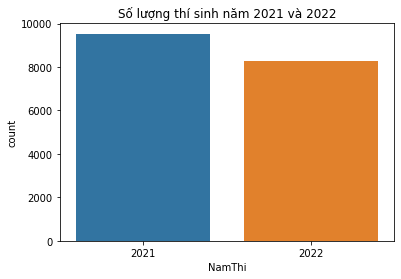

In [13]:
sns.countplot(x='NamThi', data=data_new)
plt.title('Số lượng thí sinh năm 2021 và 2022')
plt.show()

2) Tỉ lệ thí sinh thi các khối ?

Năm **2021**

In [14]:
# Khối Tự Nhiên (Lý, Hóa, Sinh) năm 2021
data_new1 = data_new[['Toan','Van','NgoaiNgu','Ly','Hoa','Sinh','NamThi']]
data_TN_2021 = data_new1[(data_new['Ly'] > 0) & (data_new['Hoa'] > 0) & (data_new['Sinh'] > 0) & (data_new['Toan'] > 0) & (data_new['Van'] > 0) & (data_new['NgoaiNgu'] > 0) & (data_new['NamThi'] == 2021)]
data_TN_2021.head(15)

,Toan,Van,NgoaiNgu,Ly,Hoa,Sinh,NamThi
279,8.6,5.75,6.6,6.75,2.5,5.25,2021
280,9.4,7.50,9.6,7.50,6.5,5.50,2021
282,8.8,6.50,9.8,8.25,2.5,5.75,2021
283,9.2,5.25,8.8,5.00,9.5,9.75,2021
289,8.6,5.25,7.8,8.50,3.5,4.75,2021
292,8.8,6.50,9.4,8.25,7.5,4.50,2021
294,6.6,4.25,9.8,5.75,2.5,5.25,2021
296,7.6,7.00,9.4,8.50,2.5,3.25,2021
298,8.8,5.50,9.4,6.75,4.5,4.50,2021
301,9.6,7.25,9.0,8.00,7.5,5.50,2021


In [15]:
data_TN_2021.index

Int64Index([ 279,  280,  282,  283,  289,  292,  294,  296,  298,  301,
            ...
            9555, 9622, 9629, 9634, 9647, 9651, 9732, 9738, 9745, 9767],
           dtype='int64', length=1115)

In [16]:
# Khối Xã Hội (Sử, Địa, Công Dân) năm 2021
data_new2 = data_new[['Toan','Van','NgoaiNgu','Su','Dia','GDCD','NamThi' ]]
data_XH_2021 = data_new2[(data_new['Su'] > 0) & (data_new['Dia'] > 0) & (data_new['GDCD'] > 0)& (data_new['Toan'] > 0) & (data_new['Van'] > 0) & (data_new['NgoaiNgu'] > 0)& (data_new['NamThi'] == 2021)]
data_XH_2021.head(5)


,Toan,Van,NgoaiNgu,Su,Dia,GDCD,NamThi
285,8.4,8.00,9.0,5.75,7.25,8.25,2021
286,8.6,8.00,9.8,4.75,6.25,7.50,2021
287,8.0,9.00,9.4,7.50,9.25,9.25,2021
288,7.8,7.50,7.8,4.00,6.25,8.75,2021
291,9.0,8.25,9.8,8.50,7.75,8.75,2021


In [17]:
data_XH_2021.index

Int64Index([ 285,  286,  287,  288,  291,  297,  302,  306,  307,  309,
            ...
            9784, 9785, 9787, 9788, 9792, 9793, 9799, 9804, 9805, 9806],
           dtype='int64', length=6479)

Năm 2022

In [18]:
# Khối Tự Nhiên (Lý, Hóa, Sinh) năm 2022
data_TN_2022 = data_new1[(data_new['Ly'] > 0) & (data_new['Hoa'] > 0) & (data_new['Sinh'] > 0) & (data_new['Toan'] > 0) & (data_new['Van'] > 0) & (data_new['NgoaiNgu'] > 0) & (data_new['NamThi'] == 2022)]
# Khối Xã Hội (Sử, Địa, Công Dân) năm 2022
data_XH_2022 = data_new2[(data_new['Su'] > 0) & (data_new['Dia'] > 0) & (data_new['GDCD'] > 0)& (data_new['Toan'] > 0) & (data_new['Van'] > 0) & (data_new['NgoaiNgu'] > 0)& (data_new['NamThi'] == 2022)]
data_TN_2022.head()

,Toan,Van,NgoaiNgu,Ly,Hoa,Sinh,NamThi
45,7.0,6.25,5.8,7.5,1.5,4.25,2022
46,8.4,6.50,4.6,7.5,5.5,4.50,2022
77,8.0,5.00,5.0,6.5,8.5,5.75,2022
81,6.0,3.50,6.4,5.5,2.5,3.25,2022
95,7.6,8.00,4.2,6.5,8.5,5.50,2022


In [19]:
data_TN_2022.index

Int64Index([   45,    46,    77,    81,    95,    98,   135,   152,   218,
              231,
            ...
            17743, 17745, 17749, 17753, 17756, 17761, 17785, 17790, 17797,
            17808],
           dtype='int64', length=962)

In [20]:
data_XH_2022.head()

,Toan,Van,NgoaiNgu,Su,Dia,GDCD,NamThi
0,2.8,2.75,3.6,3.00,6.75,6.00,2022
2,6.4,7.00,2.6,6.00,7.50,8.50,2022
4,7.0,6.00,3.8,7.25,7.00,8.50,2022
5,3.8,5.75,2.4,5.00,6.25,6.00,2022
8,6.8,6.75,3.0,7.25,7.00,8.25,2022


In [21]:
data_XH_2022.index

Int64Index([    0,     2,     4,     5,     8,    10,    14,    16,    17,
               19,
            ...
            17803, 17804, 17805, 17806, 17807, 17809, 17810, 17811, 17812,
            17813],
           dtype='int64', length=5417)

- Khối Tự nhiên năm 2021 là 1115 thí sinh, năm 2022 giảm còn 962  thí sinh
- Khối Xã hội năm 2022 là 6479 thí sinh, năm 2022 giảm 5417 thí sinh
- Năm 2021 có 1936 thí sinh tự do, năm 2022 có 1905 thí sinh tự do.
Lượng Thí sinh THPT năm 2022 giảm hơn 1000 thí so với năm 2021 nhưng mỗi năm đều có hơn 80% thí sinh đăng ký thi khối Xã hội.

2) Điểm trung bình của từng môn năm 2021 và 2022?
Trực quan phổ điểm của các môn.



In [22]:
print('Điểm trung bình Toán, Văn, Ngoại Ngữ')
data_new[['Toan','Van','NgoaiNgu']].groupby(data_new['NamThi']).mean()

Điểm trung bình Toán, Văn, Ngoại Ngữ


,Toan,Van,NgoaiNgu
NamThi,,,
2021,5.416852,6.149921,3.995446
2022,5.383366,5.781537,3.518783


In [23]:
print('Điểm trung bình khối Tự nhiên năm 2021')
data_TN_2021[['Ly','Hoa','Sinh']].mean()

Điểm trung bình khối Tự nhiên năm 2021


Ly      6.535426
Hoa     5.528700
Sinh    5.613677
dtype: float64

In [24]:
print('Điểm trung bình khối Tự nhiên năm 2022')
data_TN_2022[['Ly','Hoa','Sinh']].mean()

Điểm trung bình khối Tự nhiên năm 2022


Ly      6.614345
Hoa     5.461538
Sinh    5.266892
dtype: float64

In [25]:
print('Điểm trung bình khối Tự nhiên năm 2021')
data_XH_2021[['Su','Dia','GDCD']].mean()

Điểm trung bình khối Tự nhiên năm 2021


Su      5.107231
Dia     7.199877
GDCD    8.420204
dtype: float64

In [26]:
print('Điểm trung bình khối Tự nhiên năm 2021')
data_XH_2022[['Su','Dia','GDCD']].mean()

Điểm trung bình khối Tự nhiên năm 2021


Su      6.476463
Dia     6.859932
GDCD    8.044305
dtype: float64

2) Số điểm liệt của từng môn ? 

**Năm 2021**

In [27]:
#Toán
T = np.where((data_new['Toan'] <= 1) & (data_new['Toan'] >0))
print("Số thí sinh Liệt môn Toán : ",T[0].size)

#Văn 
V = np.where((data_new['Van'] <= 1) & (data_new['Van'] >0))
print("Số thí sinh Liệt môn Văn : ",V[0].size)

#Ngoại ngữ
NN = np.where((data_new['NgoaiNgu'] <= 1) & (data_new['NgoaiNgu'] >0))
print("Số thí sinh Liệt môn Ngoại ngữ : ", NN[0].size)

#Lý
L = np.where((data_new['Ly'] <= 1) & (data_new['Ly'] >0))
print("Số thí sinh Liệt môn Lý : ", L[0].size)

#Hóa
H = np.where((data_new['Hoa'] <= 1) & (data_new['Hoa'] >0))
print("Số thí sinh Liệt môn Hóa : ", H[0].size)

#Sinh
S = np.where((data_new['Sinh'] <= 1) & (data_new['Sinh'] >0))
print("Số thí sinh Liệt môn Sinh : ", S[0].size)

#Sử
Su = np.where((data_new['Su'] <= 1) & (data_new['Su'] >0))
print("Số thí sinh Liệt môn Sử : ", Su[0].size)

#Địa
D = np.where((data_new['Dia'] <= 1) & (data_new['Dia'] >0))
print("Số thí sinh Liệt môn Địa : ", D[0].size)

#Công dân
CD = np.where((data_new['GDCD'] <= 1) & (data_new['GDCD'] >0))
print("Số thí sinh Liệt môn Công dân : ", CD[0].size)



Số thí sinh Liệt môn Toán :  4
Số thí sinh Liệt môn Văn :  11
Số thí sinh Liệt môn Ngoại ngữ :  9
Số thí sinh Liệt môn Lý :  0
Số thí sinh Liệt môn Hóa :  0
Số thí sinh Liệt môn Sinh :  0
Số thí sinh Liệt môn Sử :  7
Số thí sinh Liệt môn Địa :  0
Số thí sinh Liệt môn Công dân :  0


Năm **2022**

In [28]:
#Toán
T = np.where((data_new['Toan'] <= 1) & (data_new['Toan'] >0))
print("Số thí sinh Liệt môn Toán : ",T[0].size)

#Văn 
V = np.where((data_new['Van'] <= 1) & (data_new['Van'] >0))
print("Số thí sinh Liệt môn Văn : ",V[0].size)

#Ngoại ngữ
NN = np.where((data_new['NgoaiNgu'] <= 1) & (data_new['NgoaiNgu'] >0))
print("Số thí sinh Liệt môn Ngoại ngữ : ", NN[0].size)

#Lý
L = np.where((data_new['Ly'] <= 1) & (data_new['Ly'] >0))
print("Số thí sinh Liệt môn Lý : ", L[0].size)

#Hóa
H = np.where((data_new['Hoa'] <= 1) & (data_new['Hoa'] >0))
print("Số thí sinh Liệt môn Hóa : ", H[0].size)

#Sinh
S = np.where((data_new['Sinh'] <= 1) & (data_new['Sinh'] >0))
print("Số thí sinh Liệt môn Sinh : ", S[0].size)

#Sử
Su = np.where((data_new['Su'] <= 1) & (data_new['Su'] >0))
print("Số thí sinh Liệt môn Sử : ", Su[0].size)

#Địa
D = np.where((data_new['Dia'] <= 1) & (data_new['Dia'] >0))
print("Số thí sinh Liệt môn Địa : ", D[0].size)

#Công dân
CD = np.where((data_new['GDCD'] <= 1) & (data_new['GDCD'] >0))
print("Số thí sinh Liệt môn Công dân : ", CD[0].size)

Số thí sinh Liệt môn Toán :  4
Số thí sinh Liệt môn Văn :  11
Số thí sinh Liệt môn Ngoại ngữ :  9
Số thí sinh Liệt môn Lý :  0
Số thí sinh Liệt môn Hóa :  0
Số thí sinh Liệt môn Sinh :  0
Số thí sinh Liệt môn Sử :  7
Số thí sinh Liệt môn Địa :  0
Số thí sinh Liệt môn Công dân :  0


# Tổng hợp kết quả thực hiện thông qua một hoặc hai dashboard, Thêm các điều khiển (slider, check box,…) để tăng tính linh động cho dashboard.

In [29]:
khoi = ['Khối Tự Nhiên','Khối Xã Hội', 'Thí Sinh tự do']
thisinh = [11.79,67,21.21]

fig = px.bar(khoi, thisinh)

fig.show()

In [30]:
df = data.sort_values(by="Toan")
fig = px.line(df, x="Toan", y="Hoa", title="Sorted Line") 
fig.show()

In [31]:
mc=pw.Pywedge_Charts(data, c=None,y='NgoaiNgu')
chart= mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')